# Evolución de los casos confirmados de COVID-19

Despliego datos:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datos = pd.read_csv("casos_coronavirus.csv") #datos desde el inicio de la pandemia hasta junio 2020

In [5]:
print(datos)

       fecha  confirmados_Nuevos  confirmados_Acumulado
0   3-3-2020                   1                      1
1   4-3-2020                   0                      1
2   5-3-2020                   1                      2
3   6-3-2020                   6                      8
4   7-3-2020                   0                      8
..       ...                 ...                    ...
91  2-6-2020                 904                  18319
92  3-6-2020                 949                  19268
93  4-6-2020                 929                  20197
94  5-6-2020                 840                  21037
95  6-6-2020                 983                  22020

[96 rows x 3 columns]


In [7]:
# Convertimos los datos a np.array
datosNP = datos.to_numpy()
print(datosNP)

[['3-3-2020' 1 1]
 ['4-3-2020' 0 1]
 ['5-3-2020' 1 2]
 ['6-3-2020' 6 8]
 ['7-3-2020' 0 8]
 ['8-3-2020' 3 12]
 ['9-3-2020' 5 17]
 ['10-3-2020' 2 19]
 ['11-3-2020' 2 21]
 ['12-3-2020' 10 31]
 ['13-3-2020' 3 34]
 ['14-3-2020' 11 45]
 ['15-3-2020' 11 56]
 ['16-3-2020' 9 65]
 ['17-3-2020' 14 79]
 ['18-3-2020' 19 97]
 ['19-3-2020' 31 128]
 ['20-3-2020' 30 158]
 ['21-3-2020' 67 225]
 ['22-3-2020' 41 266]
 ['23-3-2020' 36 301]
 ['24-3-2020' 86 387]
 ['25-3-2020' 117 502]
 ['26-3-2020' 87 589]
 ['27-3-2020' 101 690]
 ['28-3-2020' 55 745]
 ['29-3-2020' 75 820]
 ['30-3-2020' 146 966]
 ['31-3-2020' 88 1054]
 ['1-4-2020' 79 1133]
 ['2-4-2020' 132 1265]
 ['3-4-2020' 88 1353]
 ['4-4-2020' 98 1451]
 ['5-4-2020' 103 1554]
 ['6-4-2020' 74 1628]
 ['7-4-2020' 87 1715]
 ['8-4-2020' 80 1795]
 ['9-4-2020' 99 1894]
 ['10-4-2020' 81 1975]
 ['11-4-2020' 167 2142]
 ['12-4-2020' 66 2208]
 ['13-4-2020' 69 2277]
 ['14-4-2020' 166 2443]
 ['15-4-2020' 128 2571]
 ['16-4-2020' 98 2669]
 ['17-4-2020' 88 2758]
 ['18-4-20

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96.]


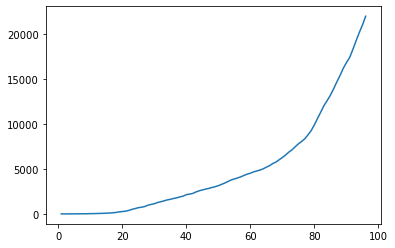

In [8]:
x = np.linspace(1,96,96)
print(x)

plt.plot(x, datosNP[:,2])

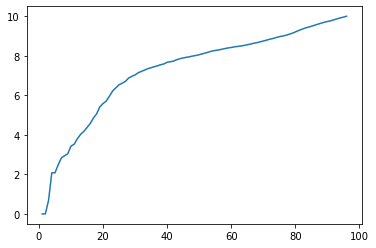

In [9]:
# Tomamos logaritmos para linealizar
y = np.log(np.float64(datosNP[:,2]))
#print(y)
plt.plot(x,y)

In [10]:
def RegresionLinealMinimosCuadrados(x, y):
    n = len(x)
    unos = np.ones(n)
    A = np.c_[unos, x]
    At = np.transpose(A)
    s = np.linalg.solve(At @ A, At @ y)
    p = np.poly1d([s[1], s[0]])
    return(p)

Utilizando la fórmula 
$$
A^tA x = A^ty
$$
para una matriz $A$ apropiada.

 
0.07737 x + 3.496


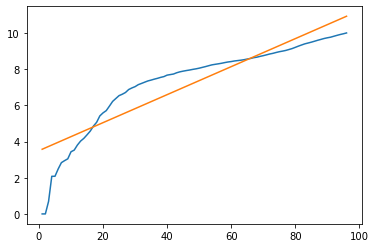

In [11]:
p = RegresionLinealMinimosCuadrados(x, y)
print(p)
plt.plot(x,y)
plt.plot(x, p(x))

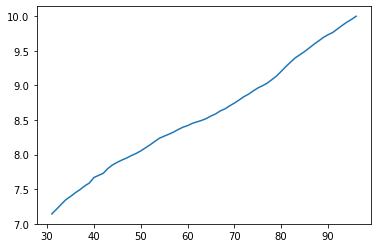

In [12]:
x30 = x[30:96]
y30 = y[30:96]
plt.plot(x30, y30)
#Tomo los datos a partir del registro 30 porque no se corresponden bien con la curva de los 1ros 30 días.

 
0.0412 x + 5.957


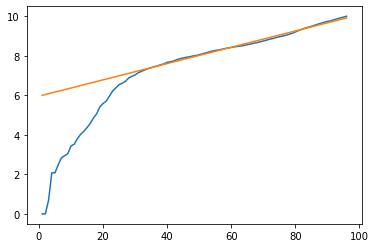

In [14]:
p = RegresionLinealMinimosCuadrados(x30, y30)
plt.plot(x, y)
plt.plot(x, p(x))
print(p)

In [42]:
print("Según el modelo, para el día 6/6/2020 (el registro 96) habría unos",np.e**p(95),"casos acumulados, lo cual representa un error del",(-np.e**p(95)*100)/22020 + 100)

Según el modelo, para el día 6/6/2020 (el registro 96) habría unos 19378.431153842183 casos acumulados, lo cual representa un error del 11.99622545939063
